# Formaldehyde Polariton Project 
## Sydney Rosenkrantz, Leonel Kachie, Katherinn Sanabria, Gustavo Sanchez, Maya Younis


In [54]:
import psi4
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
from numpy import linalg as LA
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
from matplotlib import pyplot as plt


In [55]:
# set basis set
psi4.set_options({
    'basis':'cc-pVDZ'
})

# set the number of electronic states... this is the ground state + n_states more
# we will get 2 excited-state
n_states = 2

# set the number of bond lengths to compute the stretch along
n_geoms = 25

# initialize geometry list
geoms = []

# initialize energy list... note
# there will be the ground state energy + n_states excited state energies
Es = np.zeros((n_states+1, n_geoms))

# initialize z-component of transition dipole list
mu_z = np.zeros((n_states, n_geoms))

# generate bond lengths
rs = []
for i in range(0,n_geoms):
    rs.append(1.1 + i*0.1)

# loop over bond lengths
ctr = 0
for i in rs:
    # generate the formaldehyde molecule using a z-matrix and set the C=O bond length
    mol = psi4.geometry("""
    C
    O 1 """ + str(i) + """
    H1 1 1.36 2 120
    H2 1 1.36 2 120 3 180
    symmetry c1
    0 1
    """)
    # save the geometry
    geoms.append(mol.geometry().to_array())
    psi4.set_options({
    'save_jk': True,
    })  
   
    # calculate and save the ground-state energy and wavefunction
    e, wfn = psi4.energy("b3lyp/cc-pVDZ", return_wfn=True, molecule=mol)
    
    # calculate the excited-state energies and save them to a dictionary called 'res'
    res = tdscf_excitations(wfn, states=n_states, triplets = "NONE")
    
    # parse the excitation energies from the 'res' dictionary 
    delta_e = [r["EXCITATION ENERGY"] for r in res]
    
    # parse the transition dipole moment from the 'res' dictionary
    mu = [r["ELECTRIC DIPOLE TRANSITION MOMENT (LEN)"] for r in res]
    Es[0,ctr] = e
    
    # store the results to the respective arrays
    for j in range(0, n_states):
        Es[j+1,ctr] = e + delta_e[j]
        # we only want the z-component which is index 2
        mu_z[j,ctr] = np.absolute(mu[j][2])

    
    # increment the counter!
    ctr += 1
    



Scratch directory: /tmp/

Scratch directory: /tmp/

*** tstart() called on 5536536a3eb7
*** at Fri Jun 23 04:22:46 2023

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line   138 file /usr/local/psi4/share/psi4/basis/cc-pvdz.gbs 
    atoms 2   entry O          line   198 file /usr/local/psi4/share/psi4/basis/cc-pvdz.gbs 
    atoms 3-4 entry H          line    22 file /usr/local/psi4/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RKS Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:


RuntimeError: The H2 matrix is not Positive Definite. This means the reference state is not stable.

In [47]:
print(mu_z)

# The first matrix includes the transition dipole moments of the transition between Eg and Ee1. 
# The second matrix include the transition dipole moments of the transition between Eg and Ee2.

[[1.23999166e-15 5.08507741e-15 6.63850684e-16 3.14758214e-15
  9.17292174e-16 1.39549902e-14 1.08969786e-14 3.89494037e-16
  4.71141570e-15 3.68149537e-15 1.93463953e-16 3.65127639e-15
  2.11965302e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [7.64123867e-13 2.54236574e-12 3.14557661e-13 8.54795059e-13
  5.85479391e-14 1.96555715e-13 8.20444075e-13 2.95175902e-14
  1.56247837e-13 1.52942088e-13 1.41092471e-14 5.16387272e-14
  5.69151708e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [12]:
# Take slices of information for Eg, Ee, and mu_eg only
Eg_array = np.copy(Es[0,:])
Ee1_array = np.copy(Es[1,:])
Ee2_array = np.copy(Es[2,:])
tdm1_array = np.copy(mu_z[0,:])
tdm2_array = np.copy(mu_z[1,:])

In [13]:
# fit all surfaces to a spline
# ==> Code to fit splines goes here! <== #
Eg_spline = InterpolatedUnivariateSpline(rs, Eg_array, k = 3)
Ee1_spline = InterpolatedUnivariateSpline(rs, Ee1_array, k = 3)
Ee2_spline = InterpolatedUnivariateSpline(rs, Ee2_array, k = 3)
mu1_spline = InterpolatedUnivariateSpline(rs, tdm1_array, k = 3)
mu2_spline = InterpolatedUnivariateSpline(rs, tdm2_array, k = 3)

In [14]:
R_val = 2.5

# ==> Code to evaluate Eg_spline, Ee1_spline, Ee2_spline, mu1_spline and mu2_spline at R = 2.5 Angstroms goes here! <== #
Eg_val = Eg_spline(R_val)
Ee1_val = Ee1_spline(R_val)
Ee2_val = Ee2_spline(R_val)
tdm1_val = mu1_spline(R_val)
tdm2_val = mu2_spline(R_val)

In [16]:
# conversion factor for au -> eV
au_to_eV = 27.211

# ==> Code to compute transition energy in atomic units and convert to eV goes here! <== #
transition_energy_au = Ee2_val - Eg_val
transition_energy_eV = transition_energy_au * au_to_eV
# Pre-written print the transition energies and check there values!
print(transition_energy_au)
print(transition_energy_eV)

-2.1094237467877974e-15
-5.739952957384276e-14


In [17]:
def Rabi_Hamiltonian(A_value, omega_value, r_value, g_spline, e1_spline, e2_spline, tdm1_spline, tdm2_spline):
    """Function to compute the Rabi Hamiltonian

    Arguments
    ----------
    A_value : float
        fundamental coupling strength
        
    omega_value : float
        photon energy
        
    r_value : float
        value of the bondlength
        
    g_spline : scipy spline object
        spline that is fit to the ground-state potential energy surface
        
    e1_spline : scipy spline object
        spline that is fit to the excited-state 1 potential energy surface
    
    e2_spline : scipy spline object
        spline that is fit to the excited-state 2 potential energy surface
        
    tdm1_spline : scipy spline object
        spline that is fit to the transition dipole moment surface of e1
        
    tdm2_spline : scipy spline objec
        spline that is fit to the transition dipole moment surface of e2
        
    Returns
    -------
    H : numpy array
        5x5 Rabi Hamiltonian matrix
    """
    
    # initialize 5x5 Hamiltonian matrix
    H = np.zeros((5,5))
    
    H[0,0] = g_spline(r_value)
    H[1,1] = g_spline(r_value) + omega_value
    H[2,2] = e1_spline(r_value)
    H[3,3] = e1_spline(r_value) + omega_value
    H[4,4] = e2_spline(r_value)
    H[1,2] = tdm1_spline(r_value) * A_value
    H[2,1] = tdm1_spline(r_value) * A_value
    H[1,4] = tdm2_spline(r_value) * A_value
    H[4,1] = tdm2_spline(r_value) * A_value
    # return the matrix
    return H


In [18]:
A_value = 0.003

H_Rabi = Rabi_Hamiltonian(A_value, transition_energy_au, R_val, Eg_spline, Ee1_spline, Ee2_spline, mu1_spline, mu2_spline)

In [19]:
def polariton_surfaces(A_value, omega_value, r_values, g_spline, e1_spline, e2_spline, tdm1_spline, tdm2_spline):
    """Function to compute the lower- and upper-polariton potential energy surfaces

    Arguments
    ----------
    A_value : float
        fundamental coupling strength
        
    omega_value : float
        photon energy
        
    r_value : float
        value of the bondlength
        
    g_spline : scipy spline object
        spline that is fit to the ground-state potential energy surface
        
    e_spline : scipy spline object
        spline that is fit to the excited-state potential energy surface
        
    tdm_spline : scipy spline object
        spline that is fit to the transition dipole moment surface
        
    Returns
    -------
    E_LP_of_R : numpy array
        lower-polariton potential energy surface defined at each value of r_values
        
    E_UP_of_R : numpy array
        upper-polariton potential energy surface defined at each value of r_values
    """
    # initialize lp and up surfaces
    lp_surface = np.zeros_like(r_values)
    up_surface = np.zeros_like(r_values)
    
    # loop through r values, build Rabi Hamiltonian, diagonalize, and store!
    
    for i in range(0, len(r_values)):
        
        # if there is no coupling, then we don't need to diagonalize anything
        if A_value == 0:
            lp_surface[i] = g_spline(r_values[i]) + omega_value
            up_surface[i] = e2_spline(r_values[i])
        
        # otherwise build Hamiltonian and diagonalize
        else:
            # Build the Rabi Hamiltonian
            H = Rabi_Hamiltonian(A_value, omega_value, r_values[i], g_spline, e1_spline, e2_spline, tdm1_spline, tdm2_spline)
            
            # diagonalize
            vals, vecs = LA.eigh(H)
            
            # store lp and up values
            lp_surface[i] = vals[1]
            up_surface[i] = vals[2]
    
    # return the surfaces
    return lp_surface, up_surface


In [20]:
# run this cell to compute the polariton PES
lp_surface, up_surface = polariton_surfaces(A_value, transition_energy_au, rs, Eg_spline, Ee1_spline, Ee2_spline, mu1_spline, mu2_spline)

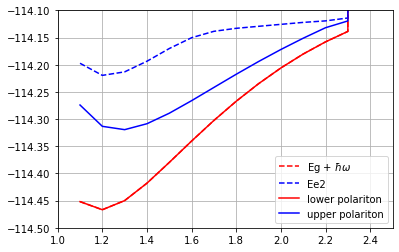

In [52]:
plt.figure()
plt.plot(rs, Eg_spline(rs)+transition_energy_au, "r--", label="Eg + $\hbar \omega$")
plt.plot(rs, Ee2_spline(rs), "b--", label="Ee2")
plt.plot(rs, lp_surface, "red", label="lower polariton")
plt.plot(rs, up_surface, "blue", label="upper polariton")
plt.grid(True)
plt.legend()
plt.ylim(-114.5, -114.1)
plt.xlim(1, 2.5)
# plt.show()
plt.savefig(F'zoomed.png', dpi = 300)

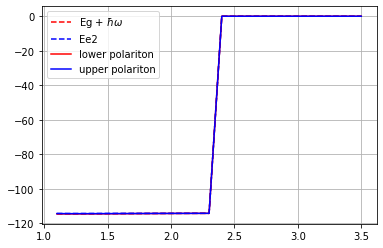

In [53]:
plt.figure()
plt.plot(rs, Eg_spline(rs)+transition_energy_au, "r--", label="Eg + $\hbar \omega$")
plt.plot(rs, Ee2_spline(rs), "b--", label="Ee2")
plt.plot(rs, lp_surface, "red", label="lower polariton")
plt.plot(rs, up_surface, "blue", label="upper polariton")
plt.grid(True)
plt.legend()
#plt.show()
plt.savefig(F'unzoomed.png', dpi = 300)